## Homework Set 2

In [29]:
## MP 573 HW2
##
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Image
import matplotlib.image as mpimg
from os.path import dirname, join as pjoin
import scipy.io as sio
from scipy import signal, ndimage, misc

## 1.3: Magnitude vs Phase

Load the MAT-file dogcat.mat, which contains 2 images (im1 and im2). Calculate the 2D (discrete) Fourier Transform of each of these images (eg: using the command fftn). 

A. Create a mixed image by using the magnitude from the Fourier Transform of im1, and the phase from the Fourier Transform of im2, and then performing a 2D (discrete) inverse Fourier Transform (eg: using the command ifftn). Does this mixed image look more like im1 or im2?

B. Create another mixed image by using the magnitude from the Fourier Transform of im2, and the phase from the Fourier Transform of im1, and then performing a 2D (discrete) inverse Fourier Transform (eg: using the command ifftn). Does this mixed image look more like im1 or im2?

What does this little experiment suggest about the relative importance of the magnitude vs the phase of the Fourier Transform of an image? 

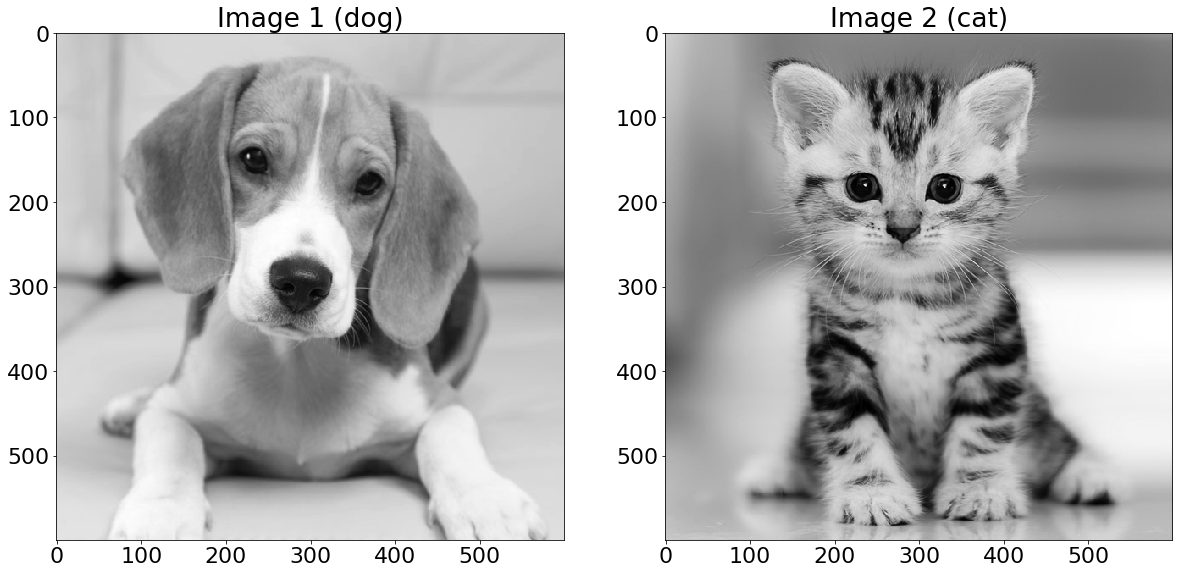

In [19]:
# Load our two images
from os.path import dirname, join as pjoin
import scipy.io as sio
data_dir = pjoin('.', 'data')
mat_fname = pjoin(data_dir, 'dogcat.mat')
mat_contents = sio.loadmat(mat_fname)
im1 = mat_contents['im1']
im2 = mat_contents['im2']

# Show the images
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
font = {'weight' : 'normal',
        'size'   : 22}
plt.rc('font', **font)
plt.title('Image 1 (dog)')
imgplot = plt.imshow(abs(im1),cmap='gray')

plt.subplot(1,2,2)
plt.rc('font', **font)
plt.title('Image 2 (cat)')
imgplot = plt.imshow(abs(im2),cmap='gray')

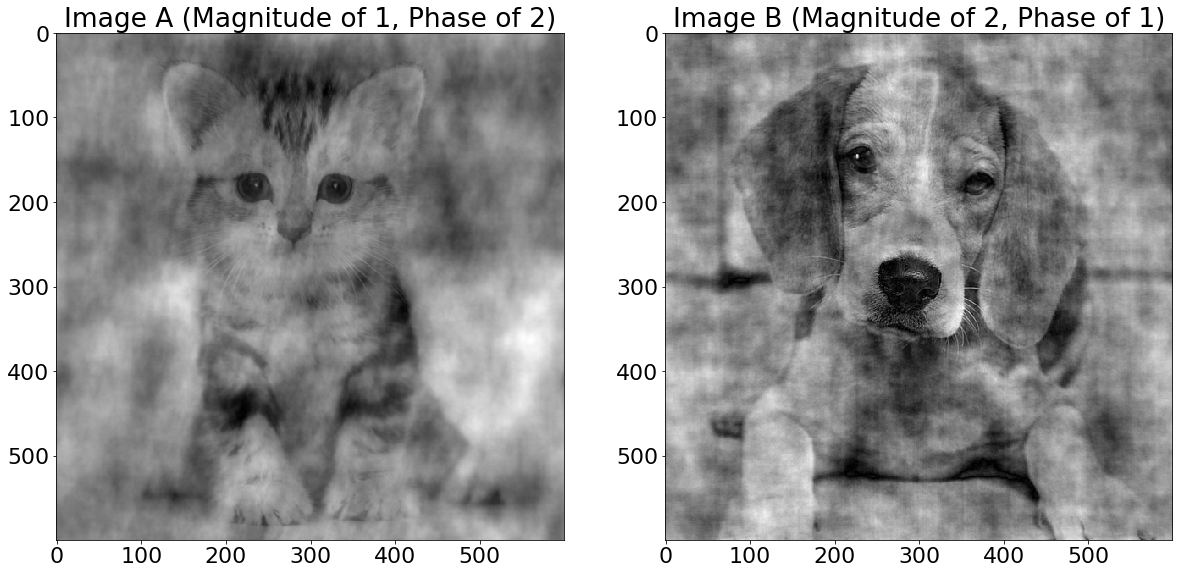

In [20]:
# To-do: calculate Fourier transforms of our images
im1hat = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(im1)))
im2hat = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(im2)))

# Create mixed images in the Fourier domain
imAhat = np.abs(im1hat)*np.exp(1j*np.angle(im2hat));
imBhat = np.abs(im2hat)*np.exp(1j*np.angle(im1hat));

# Transform back to spatial domain
imA = np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(imAhat)))
imB = np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(imBhat)))

# Display
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
font = {'weight' : 'normal',
        'size'   : 22}
plt.rc('font', **font)
plt.title('Image A (Magnitude of 1, Phase of 2)')
imgplot = plt.imshow(abs(imA),cmap='gray')

plt.subplot(1,2,2)
plt.rc('font', **font)
plt.title('Image B (Magnitude of 2, Phase of 1)')
imgplot = plt.imshow(abs(imB),cmap='gray')



## 3. Rotation and Fourier transforms

Run the Jupyter notebook cell that generates a 'triangle' shaped image to create an array f  with a 2D triangle function  $f(x,y) = \Delta(x) \Delta (2y)$ within it.

A. 

B. 

C. 



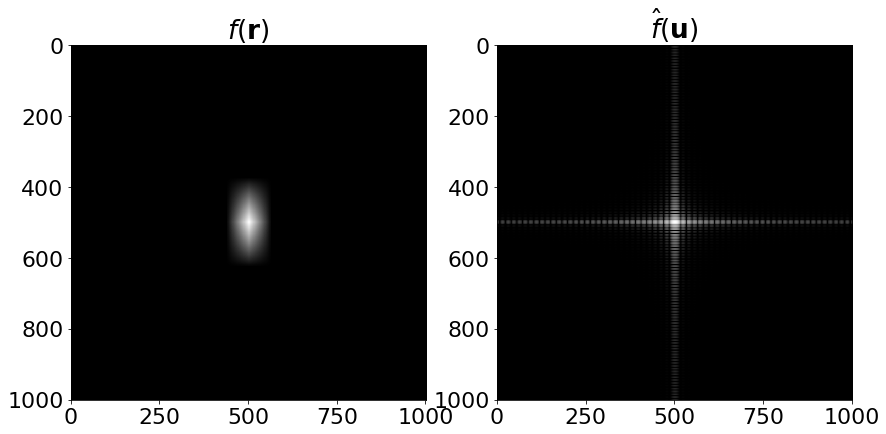

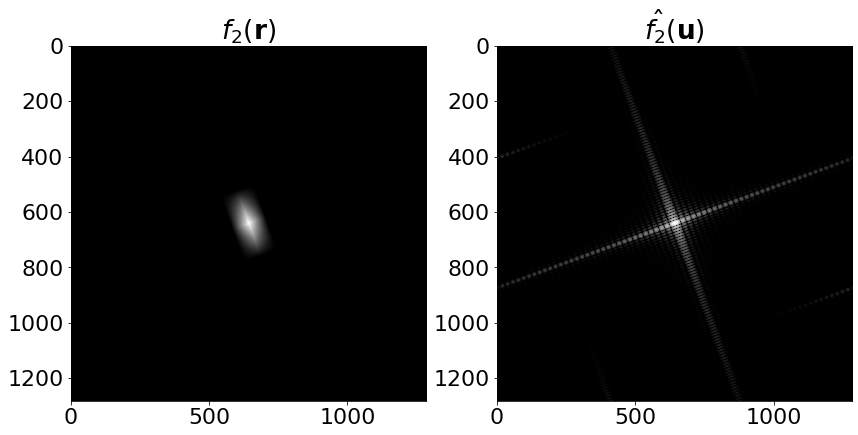

In [57]:
# Create a triangle-shaped signal in 2D
N = 1001
xmax = 4
x = np.linspace(-xmax,xmax,N)
y = x.T;
fx = 1.0*(abs(x)<0.5);
fx = signal.convolve(fx, fx, mode='same')
fy = 1.0*(abs(y)<0.25);
fy = signal.convolve(fy, fy, mode='same')
f = np.outer(fx,fy)

# Calculate the Fourier transform
fhat = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(f)))/np.sqrt(f.size)

# Display f and its Fourier transform
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.rc('font', **font)
plt.title('$f(\mathbf{r})$')
imgplot = plt.imshow(abs(f),cmap='gray')

plt.subplot(1,2,2)
plt.rc('font', **font)
plt.title('$\hat{f}(\mathbf{u})$')
imgplot = plt.imshow(np.log(abs(fhat)+1),cmap='gray')

# To-Do: Rotate f by some angle (to create f2)
f2 = ndimage.rotate(f,20,order=3)

# To-Do: Calculate the Fourier transform
fhat2 = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(f2)))/np.sqrt(f2.size)

# To-Do: Display the rotated image and its Fourier transform
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.rc('font', **font)
plt.title('$f_2(\mathbf{r})$')
imgplot = plt.imshow(abs(f2),cmap='gray')

plt.subplot(1,2,2)
plt.rc('font', **font)
plt.title('$\hat{f_2}(\mathbf{u})$')
imgplot = plt.imshow(np.log(abs(fhat2)+1),cmap='gray')

